In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
# Model / data parameters
num_classes = 10
input_shape=(32, 32, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
x_train = resizearr(x_train, tosize=(32,32))

x_test = resizearr(x_test, tosize=(32,32))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


(60000, 28, 28)
x_train shape: (60000, 32, 32)
x_test shape: (10000, 32, 32)
60000 train samples
10000 test samples
y_train shape: (60000,)
y_test shape: (10000,)


In [4]:
new_model = keras.Sequential(
    [
        keras.Input(shape=(32,32,1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [5]:
batch_size = 128
epochs = 2

new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

new_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 4s 7ms/step - loss: 0.3436 - accuracy: 0.8937 - val_loss: 0.0841 - val_accuracy: 0.9772
Epoch 2/2
422/422 [==============================] - 3s 6ms/step - loss: 0.1141 - accuracy: 0.9655 - val_loss: 0.0603 - val_accuracy: 0.9837


1


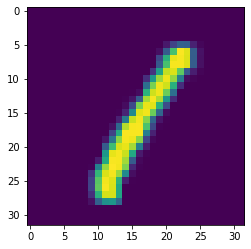

In [24]:
predictions = new_model.predict([x_test])

#predictions
i=3
print(np.argmax(predictions[i]))

plt.imshow(x_test[i])
plt.show()